In [1]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

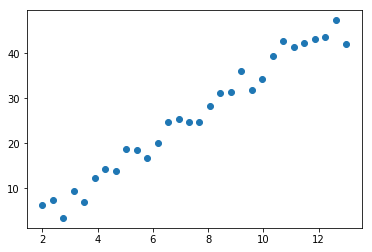

In [12]:
X = np.linspace(2,13,30)

w = np.random.randint(2,10,size = 1)[0]

b = np.random.randint(-10,-2,size = 1)[0]

y = X*w + b + np.random.randn(30)*2

plt.scatter(X,y)

[3.9236695] -3.324421362093098


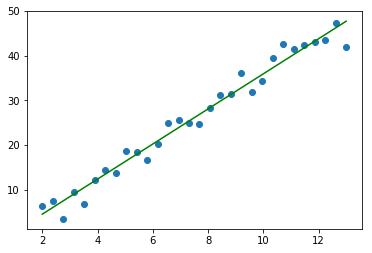

In [14]:
linear_model = LinearRegression()

linear_model.fit(X.reshape(-1,1),y)

# 算法返回的值，往往：w_、b_、y_
w_ = linear_model.coef_

b_ = linear_model.intercept_

plt.scatter(X,y)

plt.plot(X,X*w_ + b_,color = 'g')
print(w_,b_)

### 原理应用

#### 矩阵运算

In [17]:
X = X.reshape(-1,1)
X2 = np.concatenate([X,np.ones(shape = (30,1))],axis = 1)
X2

array([[ 2.        ,  1.        ],
       [ 2.37931034,  1.        ],
       [ 2.75862069,  1.        ],
       [ 3.13793103,  1.        ],
       [ 3.51724138,  1.        ],
       [ 3.89655172,  1.        ],
       [ 4.27586207,  1.        ],
       [ 4.65517241,  1.        ],
       [ 5.03448276,  1.        ],
       [ 5.4137931 ,  1.        ],
       [ 5.79310345,  1.        ],
       [ 6.17241379,  1.        ],
       [ 6.55172414,  1.        ],
       [ 6.93103448,  1.        ],
       [ 7.31034483,  1.        ],
       [ 7.68965517,  1.        ],
       [ 8.06896552,  1.        ],
       [ 8.44827586,  1.        ],
       [ 8.82758621,  1.        ],
       [ 9.20689655,  1.        ],
       [ 9.5862069 ,  1.        ],
       [ 9.96551724,  1.        ],
       [10.34482759,  1.        ],
       [10.72413793,  1.        ],
       [11.10344828,  1.        ],
       [11.48275862,  1.        ],
       [11.86206897,  1.        ],
       [12.24137931,  1.        ],
       [12.62068966,

$$w = (X^TX)^{-1}X^Ty$$

In [18]:
w = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y)
w

array([ 3.9236695 , -3.32442136])

#### 梯度下降实现线性回归

In [49]:
class LinearModel(object):
    def __init__(self):
#         初始值
        self.w = np.random.randn(1)[0]
        self.b = np.random.randn(1)[0]
        
    def model(self,x):#线性模型
        return self.w * x + self.b
    
    def cost(self,x,y):
        c = (self.model(x) - y)**2
#         偏导数（包含导数） = 梯度
        dw = 2*(self.model(x) - y)*x
        db = 2*(self.model(x) - y)*1
        return c,dw,db
#     梯度下降更新数据
    def gradient_descent(self,dw,db,step):
        self.w -= dw*step
        self.b -= db*step
        
    def fit(self,X,y):
        w_last = self.w + 0.1
        b_last = self.b + 0.1
        length = len(X)
        count = 1
        while True:
#             print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@',self.w,w_last,self.b,b_last)
            if (abs(self.w - w_last) < 1e-4) and (abs(self.b - b_last) < 1e-4):
                print('*********************')
                break
            cost_ = 0
            derivative_w = 0
            derivative_b = 0
            for xi,yi in zip(X,y):
                c_,dw_,db_ = self.cost(xi[0],yi)#求解的是每一个样本的损失、w偏导、b偏导
                cost_ += c_/length
                derivative_w += dw_/length
                derivative_b += db_/length
#             cost_、derivative_w、derivative 整体的损失，偏导
            w_last = self.w
            b_last = self.b
#             print('$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$',w_last,b_last)
            self.gradient_descent(derivative_w,derivative_b,0.01)
#             print('&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&',self.w,self.b)
            print('--------------------------------梯度下降更新次数是：%d。损失是：%0.4f'%(count,cost_))
            count +=1
            
        print('++++++++++++++++++++++++++++++++++梯度下降计算的斜率是：%0.4f。计算的截距是：%0.4f'%(self.w,self.b))
            

In [50]:
linear_model2 = LinearModel()

In [51]:
linear_model2.fit(X,y)

--------------------------------梯度下降更新次数是：1。损失是：1054.9610
--------------------------------梯度下降更新次数是：2。损失是：139.5694
--------------------------------梯度下降更新次数是：3。损失是：22.6384
--------------------------------梯度下降更新次数是：4。损失是：7.6977
--------------------------------梯度下降更新次数是：5。损失是：5.7847
--------------------------------梯度下降更新次数是：6。损失是：5.5358
--------------------------------梯度下降更新次数是：7。损失是：5.4994
--------------------------------梯度下降更新次数是：8。损失是：5.4902
--------------------------------梯度下降更新次数是：9。损失是：5.4846
--------------------------------梯度下降更新次数是：10。损失是：5.4794
--------------------------------梯度下降更新次数是：11。损失是：5.4743
--------------------------------梯度下降更新次数是：12。损失是：5.4692
--------------------------------梯度下降更新次数是：13。损失是：5.4641
--------------------------------梯度下降更新次数是：14。损失是：5.4591
--------------------------------梯度下降更新次数是：15。损失是：5.4542
--------------------------------梯度下降更新次数是：16。损失是：5.4492
--------------------------------梯度下降更新次数是：17。损失是：5.4443
--------------------------------梯度下降更新次数是：18。损失是：5.

--------------------------------梯度下降更新次数是：912。损失是：4.6780
--------------------------------梯度下降更新次数是：913。损失是：4.6780
--------------------------------梯度下降更新次数是：914。损失是：4.6779
--------------------------------梯度下降更新次数是：915。损失是：4.6779
--------------------------------梯度下降更新次数是：916。损失是：4.6779
--------------------------------梯度下降更新次数是：917。损失是：4.6779
--------------------------------梯度下降更新次数是：918。损失是：4.6779
--------------------------------梯度下降更新次数是：919。损失是：4.6779
--------------------------------梯度下降更新次数是：920。损失是：4.6778
--------------------------------梯度下降更新次数是：921。损失是：4.6778
--------------------------------梯度下降更新次数是：922。损失是：4.6778
--------------------------------梯度下降更新次数是：923。损失是：4.6778
--------------------------------梯度下降更新次数是：924。损失是：4.6778
--------------------------------梯度下降更新次数是：925。损失是：4.6778
--------------------------------梯度下降更新次数是：926。损失是：4.6778
--------------------------------梯度下降更新次数是：927。损失是：4.6777
--------------------------------梯度下降更新次数是：928。损失是：4.6777
-------------------------------

Text(0.5, 1.0, '梯度下降')

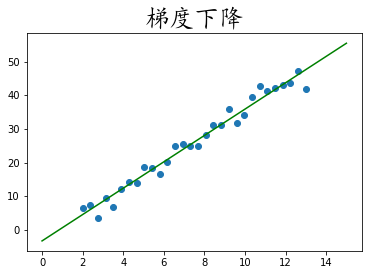

In [56]:
plt.scatter(X,y)

x1 = np.linspace(0,15,200)

plt.plot(x1,3.9201*x1 - 3.2930,color = 'g')

plt.title('梯度下降',fontproperties = 'KaiTi',size = 25)